<a id="title"> </a>
## <span style="color:black">**Starbucks User Behavior and Promotion Learning Model**</span>

In [15]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
import numpy as np

In [ ]:
data = pd.read_csv('Profile_final_0111.csv')

<a id="title"> </a>
## <span style="color:black">**Setup Input and Output**</span>

In [16]:
# INPUT
features = data[['age'
                , 'gender'
                , 'income' 
                , 'Recency'
                , 'Frequency'
                , 'Monetary'
                
                , 'bogo1_received'
                , 'bogo2_received'
                , 'bogo3_received'
                , 'bogo4_received'
                , 'discount1_received'
                , 'discount2_received'
                , 'discount3_received'
                , 'discount4_received'
                
                , 'bogo1_difficulty'
                , 'bogo2_difficulty'
                , 'bogo3_difficulty'
                , 'bogo4_difficulty'
                , 'discount1_difficulty'
                , 'discount2_difficulty'
                , 'discount3_difficulty'
                , 'discount4_difficulty'
                 
                , 'bogo1_duration'
                , 'bogo2_duration'
                , 'bogo3_duration'
                , 'bogo4_duration'
                , 'discount1_duration'
                , 'discount2_duration'
                , 'discount3_duration'
                , 'discount4_duration'
                
                , 'bogo1_completed_timediff'
                , 'bogo2_completed_timediff'
                , 'bogo3_completed_timediff'
                , 'bogo4_completed_timediff'
                , 'discount1_completed_timediff'
                , 'discount2_completed_timediff'
                , 'discount3_completed_timediff'
                , 'discount4_completed_timediff']]


# OUTPUT
labels = data[['bogo1_interest_score'
             ,'bogo2_interest_score'
             ,'bogo3_interest_score'
             ,'bogo4_interest_score'
             ,'discount1_interest_score'
             ,'discount2_interest_score'
             ,'discount3_interest_score'
             ,'discount4_interest_score']]


<a id="title"> </a>
## <span style="color:black">**Train and Test**</span>

In [17]:
# Divide the data set into training set and testing set
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Use ColumnTransformer for feature processing and one-hot encoding of categorical features
categorical_features = ['gender']
numeric_features = ['age'
                , 'income' 
                , 'Recency'
                , 'Frequency'
                , 'Monetary'
                
                , 'bogo1_received'
                , 'bogo2_received'
                , 'bogo3_received'
                , 'bogo4_received'
                , 'discount1_received'
                , 'discount2_received'
                , 'discount3_received'
                , 'discount4_received'
                
                , 'bogo1_difficulty'
                , 'bogo2_difficulty'
                , 'bogo3_difficulty'
                , 'bogo4_difficulty'
                , 'discount1_difficulty'
                , 'discount2_difficulty'
                , 'discount3_difficulty'
                , 'discount4_difficulty'
                 
                , 'bogo1_duration'
                , 'bogo2_duration'
                , 'bogo3_duration'
                , 'bogo4_duration'
                , 'discount1_duration'
                , 'discount2_duration'
                , 'discount3_duration'
                , 'discount4_duration'
                   
                , 'bogo1_completed_timediff'
                , 'bogo1_completed_timediff'
                , 'bogo1_completed_timediff'
                , 'bogo1_completed_timediff'
                , 'discount1_completed_timediff'
                , 'discount2_completed_timediff'
                , 'discount3_completed_timediff'
                , 'discount4_completed_timediff']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

# Build a random forest regressor model
regressor = RandomForestRegressor(n_estimators=100, oob_score=True, random_state=42)

# Create a Pipeline that combines feature processing and regressors
from sklearn.pipeline import Pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', regressor)
])

# Use MultiOutputRegressor to wrap Pipeline
from sklearn.multioutput import MultiOutputRegressor
model = MultiOutputRegressor(pipeline)

# Training model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

<a id="title"> </a>
## <span style="color:black">**Model performance evaluation**</span>

In [18]:
# Mean Squared Error MSE (Mean Squared Error)
# The smaller the value, the smaller the prediction error of the model.
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f'MSE: {mse}')

# Root Mean Squared Error RMSE (Root Mean Squared Error)
# The smaller the value, the smaller the prediction error of the model.
from sklearn.metrics import mean_squared_error
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'RMSE: {rmse}')

# Mean Absolute Error MAE (Mean Absolute Error)
# The smaller the value, the smaller the prediction error of the model.
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print(f'MAE: {mae}')

# R-squared R² (R-squared)
# The closer to 1, the better the model explains the target variable.
from sklearn.metrics import r2_score

# R² of training set
y_train_pred = model.predict(X_train)
r2_train = r2_score(y_train, y_train_pred)

# R² of testing set
r2_test = r2_score(y_test, y_pred)

print(f'Training R²: {r2_train}')
print(f'Testing R²: {r2_test}')

MSE: 0.015180478501885785
RMSE: 0.09034963105812883
MAE: 0.03642510991315541
Training R²: 0.9841028938187111
Testing R²: 0.8835571815505296


In [19]:
# Out-of-Bag (OOB) error
# Get oob_score_ for each regressor
oob_scores = [est.named_steps['regressor'].oob_score_ for est in model.estimators_]

# Print oob_score_ for each regressor
for idx, oob_score in enumerate(oob_scores):
    print(f'Regressor {idx + 1} OOB Score: {oob_score}')

# Summary oob_score_
average_oob_score = np.mean(oob_scores)
print(f'Average OOB Score: {average_oob_score}')

Regressor 1 OOB Score: 0.9953857795582038
Regressor 2 OOB Score: 0.6920952786112176
Regressor 3 OOB Score: 0.7019582109399445
Regressor 4 OOB Score: 0.6999152673279363
Regressor 5 OOB Score: 0.9936446660478068
Regressor 6 OOB Score: 0.9957114445020526
Regressor 7 OOB Score: 0.9964741799093652
Regressor 8 OOB Score: 0.9943491706100644
Average OOB Score: 0.8836917496883239


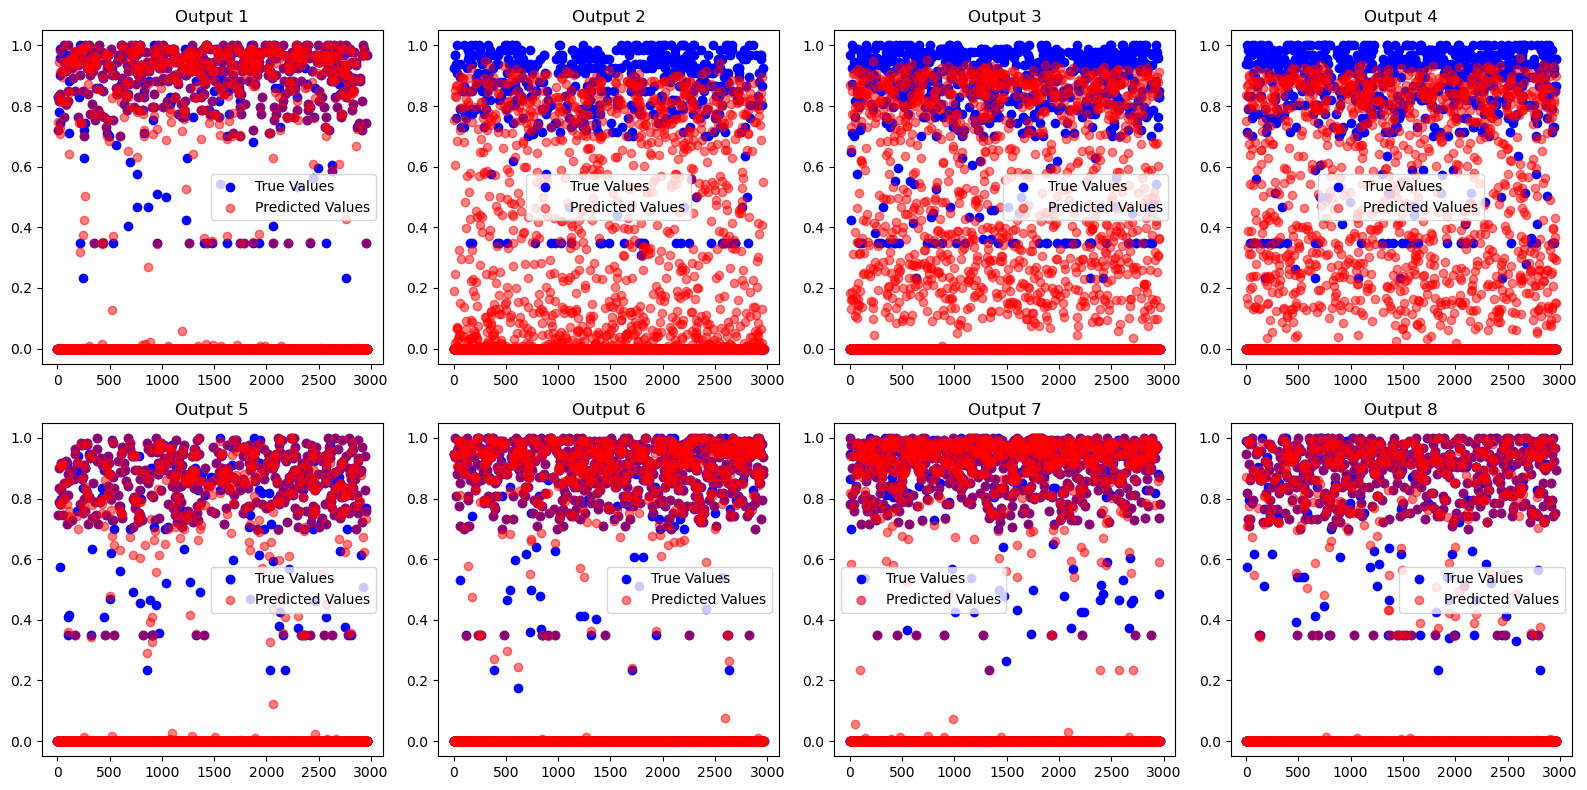

In [20]:
import matplotlib.pyplot as plt

num_rows = y_test.shape[0]

# Create 8 subplots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))

# Show a scatterplot for each output column
for i in range(8):
    row, col = divmod(i, 4)
    axes[row, col].scatter(range(num_rows), y_test.values[:, i], label='True Values', color='blue')
    axes[row, col].scatter(range(num_rows), y_pred[:, i], label='Predicted Values', color='red', alpha=0.5)
    axes[row, col].set_title(f'Output {i+1}')
    axes[row, col].legend()

# Adjust subplot layout
plt.tight_layout()
plt.show()